# Project Plan

## The Data

The data chosen for this analysis is the [Flight Status Prediction](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022) dataset from Kaggle. It contains the data for flights in the United States. It contains 5 files for each year from 2018 to 2022. The total number of records for the 5 years is around 29 million.

### Data Set Citation
Mulla, R. 2022. Flight Status Prediction. Kaggle. [Online]. [Accessed 4 December 2022]. Available from: [https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022)

### Attributes crucial for our analysis

| **Column Name**           | **Description**                                                                | **Data Type** |
|:--------------------------|:-------------------------------------------------------------------------------|:--------------|
| FlightDate                | The Date the Flight was scheduled                                              | object        |
| Airline                   | Name of the Operating Airline                                                  | object        |
| Origin                    | Origin Airport Code                                                            | object        |
| OriginCityName            | Name of the Origin City                                                        | object        |
| Dest                      | Destination Airport Code                                                       | object        |
| DestCityName              | Name of the Destination city                                                   | object        |
| Cancelled                 | Whether the Flight was Cancelled or not                                        | boolean       |
| Diverted                  | Whether the Flight was Diverted or not                                         | boolean       |
| CRSDepTime                | Scheduled Departure Time. (Format - hhmm.0)                                    | float         |
| DepTime                   | Actual Departure Time. (Format - hhmm.0)                                       | float         |
| CRSArrTime                | Scheduled Arrival Time. (Format - hhmm.0)                                      | float         |
| ArrTime                   | Actual Arrival Time. (Format - hhmm.0)                                         | float         |
| AirTime                   | The duration the flight is in air. This excludes the time spent on the runway. | float         |
| CRSElapsedTime            | Estimated Duration of the flight in minutes.                                   | float         |
| ActualElapsedTime         | Actual Duration of the flight in minutes.                                      | float         |
| DepDelay                  | Delay in departure in minutes.                                                 | float         |
| ArrDelay                  | Delay in arrival in minutes.                                                   | float         |
| Year                      | Departure Year. (Format - yyyy)                                                | int           |
| Month                     | Departure Month. (Format - mm)                                                 | int           |
| DayofMonth                | Departure Date. (Format - dd)                                                  | int           |
|IATA_Code_Operating_Airline| Code assigned by IATA and commonly used to identify a carrier                  | object        |
|FlightNumberOperatingAirline|Flight Number                                                                  | int           |


### Issues faced
1. The total percentage of scheduled flights is significantly higher than that of the cancelled flights. This makes it complex for predictions on whether a flight will be cancelled or not. The data between the flight status is split as follows.
 * Scheduled - 97% (28,348,166 flights)
 * Cancelled - 2.6% (777,267 flights)
 * Diverted - 0.2% (68,349 flights)
 * Total (Scheduled + Cancelled + Diverted) - 29,193,782
2. Null values. 
 * It is feasible to drop the null values for Scheduled flights as they are significantly higher than the Cancelled and Diverted flights.
 * For Cancelled and Diverted flights, the rows with null values cannot be dropped because we will be losing out on essential data needed for our Machine Learning model.


## Project Aim and Objectives 

Through this project, our aim is to answer the following questions.
- **Search**: Determining the airline with the least air time from a point A to B. This is critical for frequent flyers to minimize their travel time.
- **Visualisation**: To visualize the impact of covid in flights. We would want to see which airports had the most affected passengers in terms of flight cancellations and diversions.
- **Classification**: To rank the airlines in terms of their reliability. The ranking would be based on airlines that have lesser delays and cancellations.
- **Simulation**: Developing a Machine Learning model that can predict the likelihood of a flight being cancelled by using the Airline, Date, Origin, Destination, Departure Time, and Arrival Time as parameters.

### Specific Objective(s)

* __Objective 1:__ _Determine the minimum airtime to go from origin airport to destination airport._
* __Objective 2:__ _Ranking the reliability of an airline on the basis of previously cancelled, delayed and diverted flights._
* __Objective 3:__ _Visualising the impact of covid and the most affected airports._
* __Objective 4:__ _Predicting if a flight will be cancelled or not._

## System Design


### Architecture

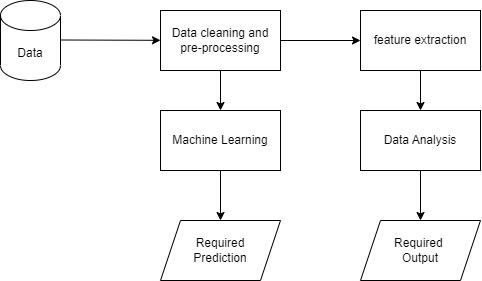

_The data used is a very large dataset with 29 million data points. There were several data points with null values and redundant values. The data was initially pre processed using manipulations with pandas package. All the null values were removed and exceptional cases were also dropped from the data and a consolidated data frame was created. According to the objectives the data was manipulated further and outputs were obtained.The required features were extracted from the consolidated data and the analysis was done accordingly. For getting the prediction of whether the flight was cancelled or not machine learning algorithms such as Logistic Regression, Random Forest Classification and Logistic Regression with SMOTE were used and accuracies were compared._
  
### Processing Modules and Algorithms

1. Data Preprocessing
 * pandas - Pandas is used to read the data and perform manipulations as part of the preprocessing.
1. Data Preprocessing
 * sklearn - Scikit learn is used for feature scaling (StandardScaler), for creating the training and testing data (train_test_split), and the LogisticRegression and RandomForestClassifier models.   
 * [imbalanced-learn](https://imbalanced-learn.org/stable/) - The imbalanced-learn package is used to oversample the data for cancelled flights.
 * seaborn - seaborn is used to visualize the confusion matrix to determine the accuracy of the model.

# Program Code 


#### _Brief Explanation of following code cell_

_Importing all the packages required for this project._

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import math

## Data Cleaning

#### _Brief Explanation of following code cell_

_Reading the flight_data and storing it into a dataframe for their subsequent years._

In [3]:
data_2018 = pd.read_csv('Dataset/archive/Combined_Flights_2018.csv')
data_2019 = pd.read_csv('Dataset/archive/Combined_Flights_2019.csv')
data_2020 = pd.read_csv('Dataset/archive/Combined_Flights_2020.csv')
data_2021 = pd.read_csv('Dataset/archive/Combined_Flights_2021.csv')
data_2022 = pd.read_csv('Dataset/archive/Combined_Flights_2022.csv')

#### _Brief Explanation of following code cell_

_Creating a list with the features we need to use._

In [4]:
features = ['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted'
            ,'CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay'
            , 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime','Distance'
            , 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline'
            , 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline'
            , 'Flight_Number_Operating_Airline', 'OriginAirportID'
            , 'OriginCityName', 'DestAirportID', 'DestCityName'
            ]

#### _Brief Explanation of following code cell_

_Filtering the DF's to contain only the target features and then consolidating them into one dataframe._

In [5]:
data_2018_new = data_2018[features]
data_2019_new = data_2019[features]
data_2020_new = data_2020[features]
data_2021_new = data_2021[features]
data_2022_new = data_2022[features]

consolidated_data = pd.concat([data_2018_new, data_2019_new, data_2020_new, data_2021_new, data_2022_new])

### Scheduled Flights

#### _Brief Explanation of following code cell_

_Creating a function to drop the missing values and generating a dataframe for flights that were scheduled (Cancelled == False) & (Diverted == False)._

In [6]:
def drop_missing_values_scheduled(df):
    cleaned_df = df.dropna()
    return cleaned_df

cleaned_df = drop_missing_values_scheduled(consolidated_data[(consolidated_data['Cancelled'] == False) & (consolidated_data['Diverted'] == False)])

#### _Brief Explanation of following code cell_

_Checking if the null values for scheduled flights were dropped successfully._

In [7]:
cleaned_df.isna().sum()

FlightDate                         0
Airline                            0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
AirTime                            0
CRSElapsedTime                     0
ActualElapsedTime                  0
Distance                           0
Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
Operating_Airline                  0
DOT_ID_Operating_Airline           0
IATA_Code_Operating_Airline        0
Flight_Number_Operating_Airline    0
OriginAirportID                    0
OriginCityName                     0
D

### Cancelled Flights

#### _Brief Explanation of following code cell_

_Fetching all the cancelled flight (Cancelled == True) & (Diverted == False)._

In [8]:
consolidated_df_cancelled = consolidated_data[(consolidated_data['Cancelled'] == True) & (consolidated_data['Diverted'] == False)]

#### _Brief Explanation of following code cell_

_Fetching the row count and checking the total null values._

In [9]:
print('Rows', len(consolidated_df_cancelled))
print(consolidated_df_cancelled.isna().sum())

Rows 777265
FlightDate                              0
Airline                                 0
Origin                                  0
Dest                                    0
Cancelled                               0
Diverted                                0
CRSDepTime                              0
DepTime                            761632
DepDelay                           761969
CRSArrTime                              0
ArrTime                            777256
ArrDelay                           777265
AirTime                            777265
CRSElapsedTime                         18
ActualElapsedTime                  777265
Distance                                0
Year                                    0
Quarter                                 0
Month                                   0
DayofMonth                              0
DayOfWeek                               0
Operating_Airline                       0
DOT_ID_Operating_Airline                0
IATA_Code_Operating_Ai

#### _Brief Explanation of following code cell_

_For cancelled flights - ArrTime, DepTime will be null so we are setting them to the scheduled time._
_Also - DepDelay, ArrDelay, AirTime, and ActualElapsedTime will be null so we are setting them to 0._

In [11]:
consolidated_df_cancelled.loc[:, 'ArrTime'] = consolidated_df_cancelled.loc[:, 'CRSArrTime']
consolidated_df_cancelled.loc[:, 'DepTime'] = consolidated_df_cancelled.loc[:, 'CRSDepTime']
consolidated_df_cancelled.loc[:, 'DepDelay'] = 0
consolidated_df_cancelled.loc[:, 'ArrDelay'] = 0
consolidated_df_cancelled.loc[:, 'AirTime'] = 0
consolidated_df_cancelled.loc[:, 'ActualElapsedTime'] = 0

#### _Brief Explanation of following code cell_

_Calculating the CRSElapsedTime if it is null. It should be the Difference in minutes for (CRSArrTime - CRSDepTime)._

In [12]:
for i in range(len(consolidated_df_cancelled)):
    if (math.isnan(consolidated_df_cancelled.iloc[i, 13])):
        hours = ((consolidated_df_cancelled.iloc[i, 9] // 100 - consolidated_df_cancelled.iloc[i, 6] // 100) * 60)
        mins = (consolidated_df_cancelled.iloc[i, 9] % 100 - consolidated_df_cancelled.iloc[i, 6] % 100) 
        consolidated_df_cancelled.iloc[i, 13] = hours + mins

#### _Brief Explanation of following code cell_

_Checking if all null values have been handled._

In [13]:
print(consolidated_df_cancelled.isna().sum())

FlightDate                         0
Airline                            0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
AirTime                            0
CRSElapsedTime                     0
ActualElapsedTime                  0
Distance                           0
Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
Operating_Airline                  0
DOT_ID_Operating_Airline           0
IATA_Code_Operating_Airline        0
Flight_Number_Operating_Airline    0
OriginAirportID                    0
OriginCityName                     0
D

## Diverted Flights

#### _Brief Explanation of following code cell_

_Retrieving all diverted flights (Diverted == True) & (Cancelled == False). Also fetching the row count and null values._

In [23]:
consolidated_df_diverted = consolidated_data[(consolidated_data['Cancelled'] == False) & (consolidated_data['Diverted'] == True)]
print(len(consolidated_df_diverted))
print(consolidated_df_diverted.isna().sum())

68347
FlightDate                             0
Airline                                0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
DepTime                                0
DepDelay                               8
CRSArrTime                             0
ArrTime                             8896
ArrDelay                           68347
AirTime                            68347
CRSElapsedTime                         3
ActualElapsedTime                  68347
Distance                               0
Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
Operating_Airline                      0
DOT_ID_Operating_Airline               0
IATA_Code_Operating_Airline            0
Flight_Num

#### _Brief Explanation of following code cell_

_Setting values with ArrTime as null to CRSArrTime and DepDelay with the difference in minutes between (DepTime - CRSDepTime)_

In [25]:
consolidated_df_diverted.loc[:, 'ArrTime'] = consolidated_df_diverted.loc[:, 'ArrTime'].fillna(value = consolidated_df_diverted.loc[:, 'CRSArrTime'])
consolidated_df_diverted.loc[:, 'DepDelay'] = consolidated_df_diverted.loc[:, 'DepDelay'].fillna(value=(consolidated_df_diverted.loc[:, 'DepTime'] - consolidated_df_diverted.loc[:, 'CRSDepTime']))

#### _Brief Explanation of following code cell_

_Setting ActualElapsedTime is NaN. Minutes (ArrTime - DepTime).
Setting CRSElapsedTime is NaN. Minutes (CRSArrTime - CRSDepTime).
Setting ArrDelay = Minutes(ArrTime - CRSArrTime)._

In [26]:
for i in range(len(consolidated_df_diverted)):
    if (math.isnan(consolidated_df_diverted.iloc[i, 14])):
        hours = ((consolidated_df_diverted.iloc[i, 10] // 100 - consolidated_df_diverted.iloc[i, 7] // 100) * 60)
        mins = (consolidated_df_diverted.iloc[i, 10] % 100 - consolidated_df_diverted.iloc[i, 7] % 100) 
        consolidated_df_diverted.iloc[i, 14] = hours + mins
        
for i in range(len(consolidated_df_diverted)):
    if (math.isnan(consolidated_df_diverted.iloc[i, 13])):
        hours = ((consolidated_df_diverted.iloc[i, 9] // 100 - consolidated_df_diverted.iloc[i, 6] // 100) * 60)
        mins = (consolidated_df_diverted.iloc[i, 9] % 100 - consolidated_df_diverted.iloc[i, 6] % 100) 
        consolidated_df_diverted.iloc[i, 13] = hours + mins
        
for i in range(len(consolidated_df_diverted)):
    if (math.isnan(consolidated_df_diverted.iloc[i, 11])):
        hours = ((consolidated_df_diverted.iloc[i, 10] // 100 - consolidated_df_diverted.iloc[i, 9] // 100) * 60)
        mins = (consolidated_df_diverted.iloc[i, 10] % 100 - consolidated_df_diverted.iloc[i, 9] % 100) 
        consolidated_df_diverted.iloc[i, 11] = hours + mins

#### _Brief Explanation of following code cell_

_Setting values with AirTime as ActualElapsedTime_

In [27]:
consolidated_df_diverted.loc[:, 'AirTime'] = consolidated_df_diverted.loc[:, 'ActualElapsedTime']

#### _Brief Explanation of following code cell_

_Checking if all null values have been handled._

In [28]:
print(consolidated_df_diverted.isna().sum())

FlightDate                         0
Airline                            0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelay                           0
CRSArrTime                         0
ArrTime                            0
ArrDelay                           0
AirTime                            0
CRSElapsedTime                     0
ActualElapsedTime                  0
Distance                           0
Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
Operating_Airline                  0
DOT_ID_Operating_Airline           0
IATA_Code_Operating_Airline        0
Flight_Number_Operating_Airline    0
OriginAirportID                    0
OriginCityName                     0
D

#### _Brief Explanation of following code cell_

_Consolidating the data and ordering it by flight date_

In [29]:
consolidated_df_cleaned = pd.concat([cleaned_df, consolidated_df_cancelled, consolidated_df_diverted])
data = consolidated_df_cleaned.sort_values(by = 'FlightDate')

#### _Brief Explanation of following code cell_
_To find the minimum airtime for a journey the data of the year 2021 is used._

In [31]:
df = data[data['Year'] == 2021]

## Objective 1

#### _Brief Explanation of following code cell_
_Creating a new dataframe with only the required features for analysis_

In [32]:
new_data=df[['Airline','Origin','Dest','Cancelled','Diverted','AirTime','IATA_Code_Operating_Airline','Flight_Number_Operating_Airline','OriginCityName','DestCityName']]

#### _Brief Explanation of following code cell_
_Understanding the structure of the new dataframe created_

In [33]:
new_data.shape

(6311870, 10)

#### _Brief Explanation of following code cell_
##### Data Cleaning
_Negative airtime values were removed_<br>
_Removing flights that were cancelled as they do not have an airtime_<br>
_Removing flights that had airtime as zero eventhough they were diverted_

In [34]:
new_data=new_data[new_data['AirTime']>=0]
new_data=new_data[new_data['Cancelled']== False]
new_data.drop(new_data[(new_data['Diverted']==True) & (new_data['AirTime']==0)].index)

,Airline,Origin,Dest,Cancelled,Diverted,AirTime,IATA_Code_Operating_Airline,Flight_Number_Operating_Airline,OriginCityName,DestCityName
3018584,Mesa Airlines Inc.,DFW,MSN,False,False,109.0,YV,5740,"Dallas/Fort Worth, TX","Madison, WI"
2871963,SkyWest Airlines Inc.,OAK,SEA,False,False,91.0,OO,3419,"Oakland, CA","Seattle, WA"
2871933,SkyWest Airlines Inc.,SFO,LAS,False,False,65.0,OO,3380,"San Francisco, CA","Las Vegas, NV"
2871964,SkyWest Airlines Inc.,SEA,OAK,False,False,113.0,OO,3419,"Seattle, WA","Oakland, CA"
2722228,American Airlines Inc.,SAN,DFW,False,False,151.0,AA,2444,"San Diego, CA","Dallas/Fort Worth, TX"
...,...,...,...,...,...,...,...,...,...,...
853680,Envoy Air,ORD,CMH,False,False,49.0,MQ,3599,"Chicago, IL","Columbus, OH"
638594,American Airlines Inc.,CLT,PHX,False,False,282.0,AA,420,"Charlotte, NC","Phoenix, AZ"
855130,Envoy Air,MIA,PIT,False,False,144.0,MQ,3651,"Miami, FL","Pittsburgh, PA"
546635,Southwest Airlines Co.,BUR,PHX,False,False,56.0,WN,1464,"Burbank, CA","Phoenix, AZ"


#### _Brief Explanation of following code cell_
_Taking the origin and destination airport codes as input_ 

In [35]:
origin=input("Enter the airport code for the origin airport:")
destination=input("Enter the airport code for the destination airport:")

Enter the airport code for the origin airport:CLT
Enter the airport code for the destination airport:PHX


#### _Brief Explanation of following code cell_
_Creating a dataframe that corresponds to the airport codes entered as input_<br>
_Sorting the dataframe in ascending order with respect to airtime_

In [36]:
df1=new_data[(new_data['Origin']==origin) & (new_data['Dest']==destination)]
df1=df1.sort_values(by=['AirTime'],ascending=True)

#### _Brief Explanation of following code cell_
_a function is created to return the Top 5 carriers from given origin to destination_

In [37]:
def min_airtime(o,d):
    print('TOP 5 FLIGHTS FROM {} TO {}'.format(o,d))
    for i in range(5):
        print('{}.Airline: {}\n  Flight code: {}{}\n  Airtime: {}'.format(i+1,df1['Airline'].iat[i],df1['IATA_Code_Operating_Airline'].iat[i],df1['Flight_Number_Operating_Airline'].iat[i],df1['AirTime'].iat[i]))
#function call
min_airtime(origin,destination)   

TOP 5 FLIGHTS FROM CLT TO PHX
1.Airline: American Airlines Inc.
  Flight code: AA1678
  Airtime: 199.0
2.Airline: American Airlines Inc.
  Flight code: AA778
  Airtime: 203.0
3.Airline: American Airlines Inc.
  Flight code: AA507
  Airtime: 207.0
4.Airline: American Airlines Inc.
  Flight code: AA588
  Airtime: 208.0
5.Airline: American Airlines Inc.
  Flight code: AA428
  Airtime: 208.0


#### _Brief Explanation of following code cell_
_A function is created for getting a pie chart_<br>
_The mean airtime is computed and flights that took time less than or equal to mean and greater than mean is found and added as a new column to the dataframe_<br>
_The pie chart is ploted into 2 categories_

In [38]:
 def plot_pie():
    mean=df1['AirTime'].mean()
    lower_airtime=[]
    for row in df1['AirTime']:
        if row <= mean:
            lower_airtime.append(True)
        else:
            lower_airtime.append(False)
    df1['lower_airtime']=lower_airtime
    count=df1['lower_airtime'].value_counts()
    x=count[0]
    y=count[1]
    fig, ax = plt.subplots()
    ax.pie([x, y], labels = ['Flights with airtime higher than average', 'Flights with airtime lower than or equal to average'], autopct = '%.1f%%')
    plt.show()

## Objective 2

#### _Brief Explanation of following code cell_
_Extracting the required features for analysing the reliability of airlines and storing it into a new dataframe_

In [39]:
airlines_df = df[['FlightDate','Airline','Origin','Dest','Cancelled','Diverted','DepDelay',
           'ArrDelay','OriginCityName','DestCityName',
           'IATA_Code_Operating_Airline','Flight_Number_Operating_Airline']]

#### _Brief Explanation of following code cell_
_Finding the count of total flights for each Airline in the year 2021_

In [40]:
total_airlines=airlines_df['Airline'].value_counts().rename_axis('Airline').reset_index(name='Total_Flights')

In [41]:
total_airlines

,Airline,Total_Flights
0,Southwest Airlines Co.,1064640
1,SkyWest Airlines Inc.,753343
2,Delta Air Lines Inc.,747998
3,American Airlines Inc.,736399
4,United Air Lines Inc.,446837
5,Republic Airlines,332925
6,Endeavor Air Inc.,266867
7,Envoy Air,255751
8,Comair Inc.,222602
9,JetBlue Airways,202702


#### _Brief Explanation of following code cell_
_Creating dataframes for Diverted Flights, Cancelled Flights and Flights that are delayed for more than 45 minutes_

In [42]:
diverted_df = airlines_df[ airlines_df['Diverted'] == True]
cancelled_df = airlines_df[ airlines_df['Cancelled'] == True]
delayed_df = airlines_df[ airlines_df['ArrDelay'] >= 45]

#### _Brief Explanation of following code cell_
_Finding the count of total diverted, cancelled and delayed(for more than 45 minutes) flights for each Airline in the year 2021_

In [43]:
total_diverted_airlines=diverted_df['Airline'].value_counts().rename_axis('Airline').reset_index(name='Total_Diverted_Flights')
total_cancelled_airlines=cancelled_df['Airline'].value_counts().rename_axis('Airline').reset_index(name='Total_Cancelled_Flights')
total_delayed_airlines=delayed_df['Airline'].value_counts().rename_axis('Airline').reset_index(name='Total_Delayed_Flights')

#### _Brief Explanation of following code cell_
_Total diverted flights for each Airline in the year 2021_

In [44]:
total_diverted_airlines

,Airline,Total_Diverted_Flights
0,Southwest Airlines Co.,2375
1,SkyWest Airlines Inc.,2134
2,American Airlines Inc.,2090
3,Delta Air Lines Inc.,1319
4,United Air Lines Inc.,1076
5,JetBlue Airways,822
6,Republic Airlines,749
7,Envoy Air,666
8,Comair Inc.,503
9,Mesa Airlines Inc.,471


#### _Brief Explanation of following code cell_
_Total cancelled flights for each Airline in the year 2021_

In [45]:
total_cancelled_airlines

,Airline,Total_Cancelled_Flights
0,Southwest Airlines Co.,23505
1,American Airlines Inc.,16478
2,SkyWest Airlines Inc.,13323
3,United Air Lines Inc.,6107
4,Envoy Air,5686
5,Spirit Air Lines,5661
6,Republic Airlines,5647
7,Mesa Airlines Inc.,4763
8,Allegiant Air,3829
9,Delta Air Lines Inc.,3631


#### _Brief Explanation of following code cell_
_Total flights delayed for more than 45 minutes for each Airline in the year 2021_

In [46]:
total_delayed_airlines

,Airline,Total_Delayed_Flights
0,Southwest Airlines Co.,89629
1,American Airlines Inc.,59850
2,SkyWest Airlines Inc.,58781
3,Delta Air Lines Inc.,34407
4,United Air Lines Inc.,33404
5,JetBlue Airways,26346
6,Republic Airlines,21231
7,Spirit Air Lines,17749
8,Envoy Air,17036
9,Mesa Airlines Inc.,16947


#### _Brief Explanation of following code cell_
_Function definition to calculate the percentage of diverted, cancelled and delayed flights with respect to the total flights for each Airline. Also calculating the total of all the percentages to see which airline is the most reliable after considering all three factors._

In [47]:
def airlineReliability():
    temp=pd.merge(total_airlines,total_diverted_airlines,on=['Airline'])
    temp1=pd.merge(temp,total_cancelled_airlines,on=['Airline'])
    Final_Airlines=pd.merge(temp1,total_delayed_airlines,on=['Airline'])
    Final_Airlines['Diverted'] = (Final_Airlines.Total_Diverted_Flights / Final_Airlines.Total_Flights)*100
    Final_Airlines['Cancelled'] = (Final_Airlines.Total_Cancelled_Flights / Final_Airlines.Total_Flights)*100
    Final_Airlines['Delayed'] = (Final_Airlines.Total_Delayed_Flights / Final_Airlines.Total_Flights)*100
    Final_Airlines['Total'] = Final_Airlines.Diverted + Final_Airlines.Cancelled + Final_Airlines.Delayed
    Final_Airlines['OnTime'] = 100-Final_Airlines.Total
    Final_Airlines=Final_Airlines.sort_values(by=["Total"], ascending=True)
    return Final_Airlines

#function call
Final_Airlines = airlineReliability()

In [48]:
Final_Airlines

,Airline,Total_Flights,Total_Diverted_Flights,Total_Cancelled_Flights,Total_Delayed_Flights,Diverted,Cancelled,Delayed,Total,OnTime
19,Hawaiian Airlines Inc.,60542,41,264,1252,0.067722,0.436061,2.067986,2.571768,97.428232
6,Endeavor Air Inc.,266867,422,974,10697,0.158131,0.364976,4.008364,4.531471,95.468529
2,Delta Air Lines Inc.,747998,1319,3631,34407,0.176337,0.485429,4.599879,5.261645,94.738355
15,Horizon Air,111628,172,2096,5004,0.154083,1.877665,4.482746,6.514495,93.485505
11,Alaska Airlines Inc.,188955,432,3217,10415,0.228626,1.702522,5.511894,7.443042,92.556958
8,Comair Inc.,222602,503,2254,14405,0.225964,1.012570,6.471191,7.709724,92.290276
16,Capital Cargo International,99331,315,1323,6289,0.317122,1.331910,6.331357,7.980389,92.019611
5,Republic Airlines,332925,749,5647,21231,0.224976,1.696178,6.377112,8.298265,91.701735
4,United Air Lines Inc.,446837,1076,6107,33404,0.240804,1.366718,7.475657,9.083178,90.916822
7,Envoy Air,255751,666,5686,17036,0.260410,2.223256,6.661167,9.144832,90.855168


#### _Brief Explanation of following code cell_
_Top 10 most reliable airlines_

In [49]:
top_10_airlines = Final_Airlines[['Airline']].head(10)
top_10_airlines

,Airline
19,Hawaiian Airlines Inc.
6,Endeavor Air Inc.
2,Delta Air Lines Inc.
15,Horizon Air
11,Alaska Airlines Inc.
8,Comair Inc.
16,Capital Cargo International
5,Republic Airlines
4,United Air Lines Inc.
7,Envoy Air


In [50]:
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

#### _Brief Explanation of following code cell_
_Function definition to display bar chart showing the most reliable airlines_

In [51]:
def first_plot():
    top_ten_airlines = Final_Airlines[['Airline','OnTime']].head(10)
    top_ten_airlines=top_ten_airlines.sort_values(by=['OnTime'], ascending=True)
    top_ten_airlines.plot(x='Airline',kind="barh", figsize=(8, 5), color=pal[5], title="Top 10 most Reliable Airlines - 2021")

#### _Brief Explanation of following code cell_
_Function definition to display percentage stacked bar chart showing percentage of diverted, cancelled and delayed flights with respect to the total flights_

In [52]:
def second_plot():
    Final_Airlines_plot = Final_Airlines[['Airline','OnTime','Diverted','Cancelled','Delayed']]
    Final_Airlines_plot.plot(x='Airline', kind='barh', stacked=True,title='Reliability of Airlines',figsize=(9,5),width=0.6,
                         color=['green','yellow','blue','red'])

## Objective 3

#### _Brief Explanation of following code cell_

Separating the dataset in two dataset. One of the year 2020 and another one with the others years.

In [53]:
CF_flight_data = data [ data["Year"] != 2022]
CF_flight_data_2020 = CF_flight_data[ CF_flight_data["Year"] == 2020]
CF_flight_data_except_2020 = CF_flight_data[ CF_flight_data["Year"] != 2020]

#### _Brief Explanation of following code cell_

Computing the ratio of cancelled flights during Covid-19 for each Origin airport

In [54]:
CF_flight_2020_filtered = CF_flight_data_2020[['Cancelled', 'Diverted', 'OriginCityName', 'DestCityName']]
CF_flight_2020_filtered = CF_flight_2020_filtered.groupby('OriginCityName').sum()
CF_flight_2020_filtered = CF_flight_2020_filtered.sort_values(by="Cancelled",ascending=False)

CF_flight_2020_occurences = CF_flight_data_2020[['Origin', 'OriginCityName']]
CF_flight_2020_occurences = CF_flight_2020_occurences.groupby('OriginCityName').count()
CF_flight_2020_occurences.rename(columns = {'Origin':'Nb_Occurences'}, inplace = True)

CE_flight_during_covid = pd.merge(CF_flight_2020_filtered, CF_flight_2020_occurences, left_index=True, right_index=True)

CE_flight_during_covid["Cancellation_Ratio"] = CE_flight_during_covid["Cancelled"] / CE_flight_during_covid["Nb_Occurences"] 
CE_flight_during_covid = CE_flight_during_covid [CE_flight_during_covid['Cancellation_Ratio'] > 0.02]
CE_flight_during_covid = CE_flight_during_covid.round({'Cancelled': 0, 'Diverted': 0, 'Nb_Occurences': 0, 'Cancellation_Ratio': 3})

#### _Brief Explanation of following code cell_

Computing the ratio of cancelled flights during Covid-19 for each Origin airport

In [55]:
CF_flight_except_2020_occurences = CF_flight_data_except_2020[['Origin', 'OriginCityName']]
CF_flight_except_2020_occurences = CF_flight_except_2020_occurences.groupby('OriginCityName').count()
CF_flight_except_2020_occurences.rename(columns = {'Origin':'Nb_Occurences'}, inplace = True)

CF_flight_except_2020_filtered = CF_flight_data_except_2020[['Cancelled', 'Diverted', 'Origin', 'Dest', 'OriginCityName', 'DestCityName']]
CF_flight_except_2020_filtered = CF_flight_except_2020_filtered.groupby('OriginCityName').sum()
CF_flight_except_2020_filtered = CF_flight_except_2020_filtered.sort_values(by="Cancelled",ascending=False)

CE_flight_without_covid_except_2020 = pd.merge(CF_flight_except_2020_filtered, CF_flight_except_2020_occurences, left_index=True, right_index=True)

CE_flight_without_covid_except_2020['Cancelled'] = CE_flight_without_covid_except_2020['Cancelled'] / 3
CE_flight_without_covid_except_2020['Diverted'] = CE_flight_without_covid_except_2020['Diverted'] / 3
CE_flight_without_covid_except_2020['Nb_Occurences'] = CE_flight_without_covid_except_2020['Nb_Occurences'] / 3

CE_flight_without_covid_except_2020["Cancellation_Ratio"] = CE_flight_without_covid_except_2020["Cancelled"] / CE_flight_without_covid_except_2020["Nb_Occurences"] 
CE_flight_without_covid_except_2020 = CE_flight_without_covid_except_2020 [CE_flight_without_covid_except_2020['Cancellation_Ratio'] > 0.01]
CE_flight_without_covid_except_2020 = CE_flight_without_covid_except_2020.round({'Cancelled': 0, 'Diverted': 0, 'Nb_Occurences': 0, 'Cancellation_Ratio': 3})

#### _Brief Explanation of following code cell_

Filtering the above datasets obtained to keep only the results with more than 1700 cancelled flights per Origin airports

In [57]:
CE_flight_during_covid = CE_flight_during_covid[ CE_flight_during_covid['Cancelled'] > 1700]
CE_flight_without_covid_except_2020 = CE_flight_without_covid_except_2020[ CE_flight_without_covid_except_2020['Cancelled'] > 1700]

#### _Brief Explanation of following code cell_

Computing the number of cancelled flight during the Covid-19 period Vs. the years without Covid

In [58]:
CF_flight_except_2020_flights = CF_flight_data_except_2020[['DestCityName', 'OriginCityName', 'Cancelled']]
CF_flight_except_2020_flights = CF_flight_except_2020_flights.groupby(['OriginCityName', 'DestCityName']).count()
CF_flight_except_2020_flights = CF_flight_except_2020_flights.sort_values(by="Cancelled",ascending=False)
CF_flight_except_2020_flights['Cancelled'] = CF_flight_except_2020_flights['Cancelled'] / 3
CF_flight_except_2020_flights.rename(columns = {'Cancelled':'Cancelled_except_2020'}, inplace = True)

CF_flight_2020_flights = CF_flight_data_2020[['DestCityName', 'OriginCityName', 'Cancelled']]
CF_flight_2020_flights = CF_flight_2020_flights.groupby(['OriginCityName', 'DestCityName']).count()
CF_flight_2020_flights = CF_flight_2020_flights.sort_values(by="Cancelled",ascending=False)
CF_flight_2020_flights.rename(columns = {'Cancelled':'Cancelled_2020'}, inplace = True)

CF_flight_Cancellation_Study_Covid = pd.merge(CF_flight_2020_flights, CF_flight_except_2020_flights, left_index=True, right_index=True)
CF_flight_Cancellation_Study_Covid = CF_flight_Cancellation_Study_Covid[CF_flight_Cancellation_Study_Covid['Cancelled_except_2020'] > 10000]

## Objective 4

#### _Brief Explanation of following code cell_

_Filtering data to include the last 2 years and removing flights that were Diverted for the Machine Learning model._

In [59]:
data_2122 = data[(data['Year'] == 2021) | (data['Year'] == 2022)]
data_2122 = data_2122[data_2122['Diverted'] == False]
print('Size of the DataFrame', len(data_2122))

Size of the DataFrame 10364996


#### _Brief Explanation of following code cell_

_Splitting the dataframe into the independant variables and target variable._

In [60]:
independant_variables = ['CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'DOT_ID_Operating_Airline', 'OriginAirportID', 'DestAirportID']
filtered_df = data_2122[independant_variables]
cancelled = data_2122['Cancelled']

#### _Brief Explanation of following code cell_

_Creating the training and test dataset._

In [62]:
x_train, x_test, y_train, y_test = train_test_split(filtered_df, cancelled, test_size=0.3, random_state=42)

### Comparing the efficiency of different models over the dataset.

### 1. Logistic Regression without oversampling

#### _Brief Explanation of following code cell_

_In the following cell, we are standardising the data. We only need this for the independant variables as the target variable does not need any standardisation._

In [63]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

#### _Brief Explanation of following code cell_

_Applying logistic regression to the data and determining the accuracy._

In [64]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train_std, y_train)

#Determining the accuracy
score = logistic_regression.score(x_test_std, y_test)
print('Accuracy', round(score*100, 2))

Accuracy 97.74


#### _Brief Explanation of following code cell_

_In the following code cells we are getting the predicted values for the test data and generating a confusion matrix._

In [65]:
predicted_values = logistic_regression.predict(x_test)
confusion_matrix_lr = metrics.confusion_matrix(y_test, predicted_values)
print(confusion_matrix_lr)

[[2351394  687938]
 [  51681   18486]]


#### _Comment on previous cell output_
_The output from the previous cell determines that the number of cancellations were too less for the model. The model predicts that majority of the flights are not cancelled which is not the case._

#### _Brief Explanation of following code cell_

_Oversampling the data using SMOTE. This creates synthetic data for the minority class (Cancelled Flights). We only create the synthetic data for the training set to ensure that the test data is accurate._

In [66]:
smote = SMOTE(sampling_strategy=0.4)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

### 2. Logistic Regression with oversampling

#### _Brief Explanation of following code cell_

_Applying Feature scaling to the oversampled data._

In [67]:
x_train_smote_std = scaler.fit_transform(x_smote)
x_test_smote_std = scaler.transform(x_test)

#### _Brief Explanation of following code cell_

_Applying Logistic Regression to the oversampled data._

In [68]:
logistic_regression.fit(x_train_smote_std, y_smote)
score = logistic_regression.score(x_test_smote_std, y_test)
print('Accuracy', round(score*100, 2))

Accuracy 97.37


#### _Brief Explanation of following code cell_

_In the following code cells we are getting the predicted values for the test data and generating a confusion matrix._

In [69]:
predicted_values = logistic_regression.predict(x_test_smote_std)
confusion_matrix_lr_oversampled = metrics.confusion_matrix(y_test, predicted_values)
print(confusion_matrix_lr_oversampled)

[[3026596   12736]
 [  68975    1192]]


#### _Comment on previous cell output_
_When compared to the original data, the oversampled data is able to make much better predictions for flights that are not cancelled. However, the accuracy for cancelled flights decreases even further._

### 3. Random Forest Classifier

#### _Brief Explanation of following code cell_

_Applying the RandomForestClassifier algorithm to the data. The data does not need to be scaled for this algorithm._

In [71]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=12)

#### _Brief Explanation of following code cell_

_Checking the accuracy of the algorithm._

In [72]:
score = clf_rf.score(x_test, y_test)
print('Accuracy', round(score*100, 2))

Accuracy 97.7


#### _Brief Explanation of following code cell_

_Predicting the values from this algorithm and then generating the confusion matrix._

In [73]:
predicted_values = clf_rf.predict(x_test)
confusion_matrix_rf = metrics.confusion_matrix(y_test, predicted_values)
print(confusion_matrix_rf)

[[3031181    8151]
 [  63341    6826]]


#### _Comment on previous cell output_
_This algorithm predicts the most accurate number for flights that were not cancelled. However, the accuracy for cancelled flights is lesser than the Logistic Regression Algorithm._

#### _Brief Explanation of following code cell_

_Defining a function that will display the confusion matrix for the different ML algorithms._

In [74]:
def show_confusion_matrix():
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))
    ax[0].set_title("Logistic Regression", fontsize=12, fontweight="bold")
    sns.heatmap(confusion_matrix_lr, annot = True, fmt = '.0f', linewidths=.7, ax=ax[0])

    ax[1].set_title("Logistic Regression OverSampled Data", fontsize=12, fontweight="bold")
    sns.heatmap(confusion_matrix_lr_oversampled, annot = True, fmt = '.0f', linewidths=.5, ax=ax[1])


    ax[2].set_title("Random Forest Classification", fontsize=12, fontweight="bold")
    sns.heatmap(confusion_matrix_rf, annot = True, fmt = '.0f', linewidths=.5, ax=ax[2])
    plt.show()

# Project Outcome 

## Overview of Results
_From the analysis of the flight data from 2018-2021 we were able to obtain satisfactory results for the objectives mentioned above. Initially the raw data had a lot of discrepancies such as null values, redundant values, missing values, inconsistent values, outliers etc. For each objectives the requisite features were extracted and sometimes a consolidated dataframe was formed to obtain the output._

_After analysis we were left with various interesting findings that can be very useful for a person who is going to embark on a journey in the United States of America. If a person were to travel from point A to B he / she will be able to find the flight that is apt for him / her with the minimum travel time he / she has to spare. While choosing a carrier to fly, it is extremely important to see which airline that carrier is of. For this reason, we have come up with a ranking system. We have analysed the data to see if the airline is reliable or not and ranked them accordingly. As we know, COVID – 19 had a huge impact on the airline industry. The pandemic caused cancellation and delaying of flights causing a lot of inconvenience for passengers. We have visualized the data from pre and post covid times to see if the changes caused due to covid was reverted back. Last but not the least, we have created a model that predicts if a flight will be cancelled or not. The results obtained along with the visualization are explained in detail below._


## Objective 1

### Explanation of Results

_For the first obejctive we are finding the flights which takes the least time to go from a place A to B. This is important for frequent travelers as it will help them choose flights effectively and save valuable time. In doing so we have used the data from the year 2021 (contains 6311870 records) for the following reasons:_
    _1. The large size of the dataset caused the analysis to be complex and time consuming which is not feasible.
    2. This was the most recent year with complete data._

_The chosen dataset was further filtered so that only the required features for this particular analysis is present in it. After filtering and slight cleaning the analysis was done (the code and brief explanation of which is in the cells above). The airport codes of the origin and destination airports are taken as an input from the user. The result obtained is the Top 5 flight details that takes the least amount of time to fly from the Airport A to Airport B._

_The details of the flight includes: 1. Which Airline the carrier is of
                                    2. Unique flight/carrier code 
                                    3. Airtime
Using these details one can choose the flight that is apt for their journey._

### Visualisation
_The following pie chart shows the percentages of flights that has an airtime greater than the average airtime, and the flights that has an airtime less than or equal to the average airtime._<br>
_In this particular case the flights from CLT (Charlotte,NC) to PHX(Phoenix,AZ) is considered._


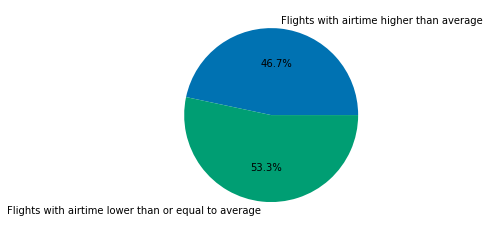

In [75]:
#function call
plot_pie()

## Objective 2
### Explanation of Results

For the second objective, we have ranked the airlines in terms of their reliability. Cancellations, delays, and diversions of the flights were used as the three criteria to rank different airlines. We’ve analysed the data for the year 2021 which had the flight details for a total of 20 airlines.<br><br>
Reliability in this ranking refers to how many flights were cancelled, diverted, or delayed for more than 45 minutes relative to the total number of flights that airline operated in 2021. As a result, an airline is considered more reliable if there are fewer cancellations, diversions, or delays.<br><br>
Hawaiian Airlines Inc. is the most reliable airline, according to the analysis. Only 0.068% of the 60542 total flights were diverted, 0.44% were cancelled, and 2% were delayed. However, due to their high rate of cancelled and delayed flights, Allegiant Air is the least reliable airline. Out of 115881 flights, 3.3% were cancelled, 0.2% were diverted and 13.3% were delayed making it very unreliable airline. In a similar manner we can analyze the reliability of all airlines.<br><br>
From the analysis, we can conclude that for the year 2021, Hawaiian Airlines Inc, Endeavor Air Inc, Delta Air Lines Inc, Horizon Air and Alaska Airlines Inc are the top 5 most reliable airlines in the US and JetBlue Airways, CommutAir Aka Champlain Enterprises Inc, and Allegiant Air are the three least reliable ones.

### Visualisation

_The following bar chart shows the top 10 most reliable airlines in 2021_<br>

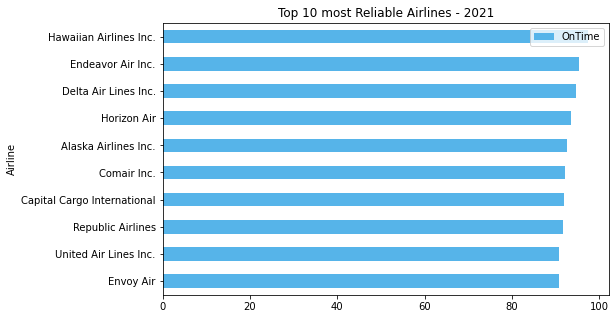

In [76]:
first_plot()

_The following percentage stacked bar chart shows the airlines reliability ranking for the year 2021_<br>

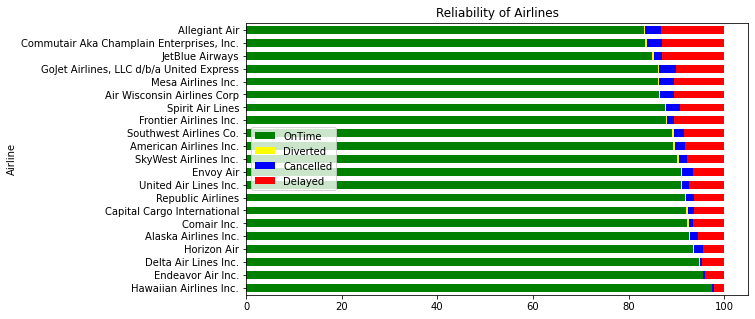

In [77]:
second_plot()

## Objective 3
### Explanation of Results


We decided to look at the issue of the impact of Covid-19 on flights in the USA. 
For this purpose we split our dataset in two. First, a first sub-dataset composed of the years 2018, 2019 and 2021. 
We exclude the year 2022 because the dataset is not complete for this year. Only 3 out of 4 quarters. 
Then a second sub-dataset consisting of the year 2020. After searching on the internet and by personal knowledge Covid-19 had 
an impact for the year 2020. 

We obtained quite interesting results. In particular, by looking more deeply into the cancellation of flights in 2020 compared to the rest on average. We talk about average because we aggregate as a sum over the years 2018, 2019 and 2021 and divide by 3 because we have 3 years. What we get is that there were many more flight cancellations in the year 2020 than in the rest of the years. This can be explained quite well by the rather strong changes that Covid-19 has brought to our companies. Even more so in heavily populated countries like the USA. 

On the other hand we have studied Origin - Destination flights and observed the differences in cancellation on these flights during the Covid-19 period and outside this period. Again the number of cancellations is much higher in 2020. 

### Visualisation

On this first plot we look at the numbers of cancelled flights by city from which flights to other cities in the US originated during the Covid (2020).

<AxesSubplot:xlabel='OriginCityName'>

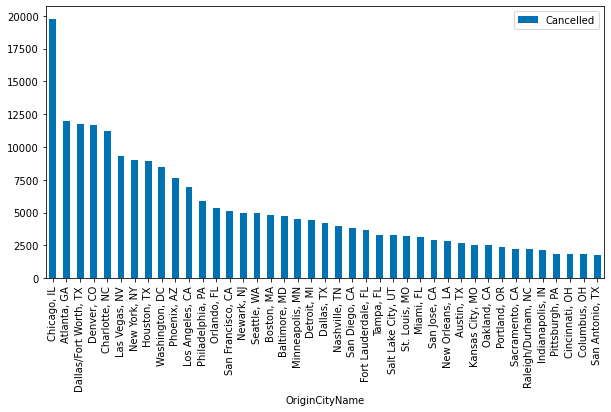

In [78]:
CE_flight_during_covid.plot.bar(y='Cancelled', figsize=(10, 5))

On this second plot we look at the numbers of cancelled flights by city from which flights to other cities in the 
US originate outside the covid period.

<AxesSubplot:xlabel='OriginCityName'>

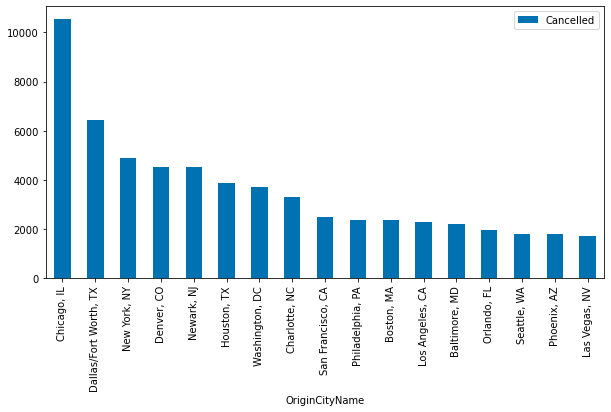

In [79]:
CE_flight_without_covid_except_2020.plot.bar(y='Cancelled', figsize=(10, 5))

In this table we can see the ratio of cancelled flights without covid per city of origin

In [80]:
CE_flight_without_covid_except_2020.head()

,Cancelled,Diverted,Nb_Occurences,Cancellation_Ratio
OriginCityName,,,,
"Chicago, IL",10531.0,1022.0,403435.0,0.026
"Dallas/Fort Worth, TX",6443.0,610.0,239077.0,0.027
"New York, NY",4899.0,548.0,218094.0,0.022
"Denver, CO",4538.0,752.0,268980.0,0.017
"Newark, NJ",4524.0,371.0,137530.0,0.033


In the next table we can see the ratio of cancelled flights during the covid by city of origin. 
These ratios are much higher during the covid-19

In [81]:
CE_flight_during_covid.head()

,Cancelled,Diverted,Nb_Occurences,Cancellation_Ratio
OriginCityName,,,,
"Chicago, IL",19738,480,286749,0.069
"Atlanta, GA",11973,410,255350,0.047
"Dallas/Fort Worth, TX",11740,413,225797,0.052
"Denver, CO",11666,394,205552,0.057
"Charlotte, NC",11205,310,186070,0.060


In this last table we compare flights during and outside the Covid-19 period. 
The numbers of cancelled flights are drastically different in these two periods. 

In [82]:
CF_flight_Cancellation_Study_Covid

,,Cancelled_2020,Cancelled_except_2020
OriginCityName,DestCityName,,
"San Francisco, CA","Los Angeles, CA",8915,13575.333333
"Los Angeles, CA","San Francisco, CA",8895,13579.666667
"Chicago, IL","New York, NY",8321,14616.666667
"New York, NY","Chicago, IL",8303,14620.333333
"Los Angeles, CA","Las Vegas, NV",7375,10463.333333
"Las Vegas, NV","Los Angeles, CA",7331,10450.666667
"Washington, DC","Chicago, IL",7025,10014.000000
"Chicago, IL","Washington, DC",6997,10020.666667
"New York, NY","Boston, MA",6652,10653.666667


## Objective 4 
### Explanation of Results

We used multiple models to evaluate their performance with our data. To oversample the data we created additional records where flights were cancelled using the SMOTE(Synthetic Minority Oversampling Technique) algorithm. The following is the observation of the performance between the various models. 

| Model                          | Accuracy | Accurate Scheduled Predictions | Accurate Cancelled Predictions | Incorrect Predictions |
|:--------------------------------|:----------:|:--------------------------------:|:--------------------------------:|:-----------------------:|
| Logistic Regression            | 97.74    | 2,344,750                      | 18,714                         | 746,035               |
| Random Forest Classification   | 97.7     | 3,031,181                      | 6,826                          | 71,492                |
| Logistic Regression with SMOTE | 97.37    | 3,026,593                      | 1,197                          | 81,709                |

* **Logistic Regression:** The Logistic Regression model without any oversampling was the most accurate with the highest number of cancellations predicted. However, this came at the cost of incorrect predictions and a reduced accuracy of predicting flights that were not cancelled.
* **Random Forest:** The Random Forest model rated a higher accuracy than Logistic Regression when it comes to predicted flights that were not cancelled. But the accuracy of predicted cancelled flights were even lesser. It was approximately 36% of what Logistic Regression was able to predict. This model did have lesser false predictions.
* **Logistic Regression with oversampled data:** This model with synthetic created through SMOTE also had a great accuracy rate for predicting flights that were not cancelled. However this model was the least accurate when it came to predicting flights that were actually cancelled. 

### Visualisation

### Logistic Regression Confusion Matrix

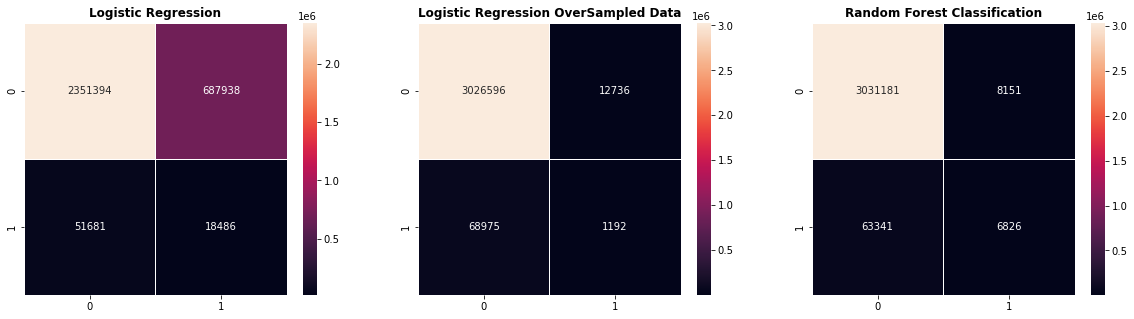

In [83]:
show_confusion_matrix()

# Conclusion

### Achievements

After the analysis of data we were successfully able to:

1. Recommend the best flights to a destination from an origin.
2. Rank the airlines according to its reliability making it easier for the passengers to choose a flight that will be less likely to be cancelled, delayed or diverted.
3. Visualize the impact of covid on flights. We were able to make a comparison between pre and post covid times.
4. Predict if a flight will be cancelled or not. 

### Limitations

The main limitation in terms of the project was the ratio of cancellations and divertions to scheduled flights. One more limitation that we felt were that many other factors come into cancellation such as weather that can be utilised by visualising a pattern in the factors that led to the flight getting cancelled.

### Future Work

In the future, we would like to get a more comprehensive data set that contains more accurate data and additional columns to determine what reason the flights were cancelled for.

Some of the outputs obtained were computed using a very small portion of the dataset. In the future we would like to analyze the data as a whole and see if the obtained outputs can be modified to better ones.